In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [4]:
data_apple = pd.read_csv('apple_quality.csv')
data_apple.head(20)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [5]:
data_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [6]:
data_apple.duplicated().sum()

0

In [7]:
data_apple['Acidity'] = data_apple['Acidity'].astype('float')

In [8]:
numeric_features = data_apple.select_dtypes(include='float')

In [9]:
data_apple['Quality'] = data_apple['Quality'].map({'good':1, 'bad': 0})

In [10]:
data_apple.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


# EDA

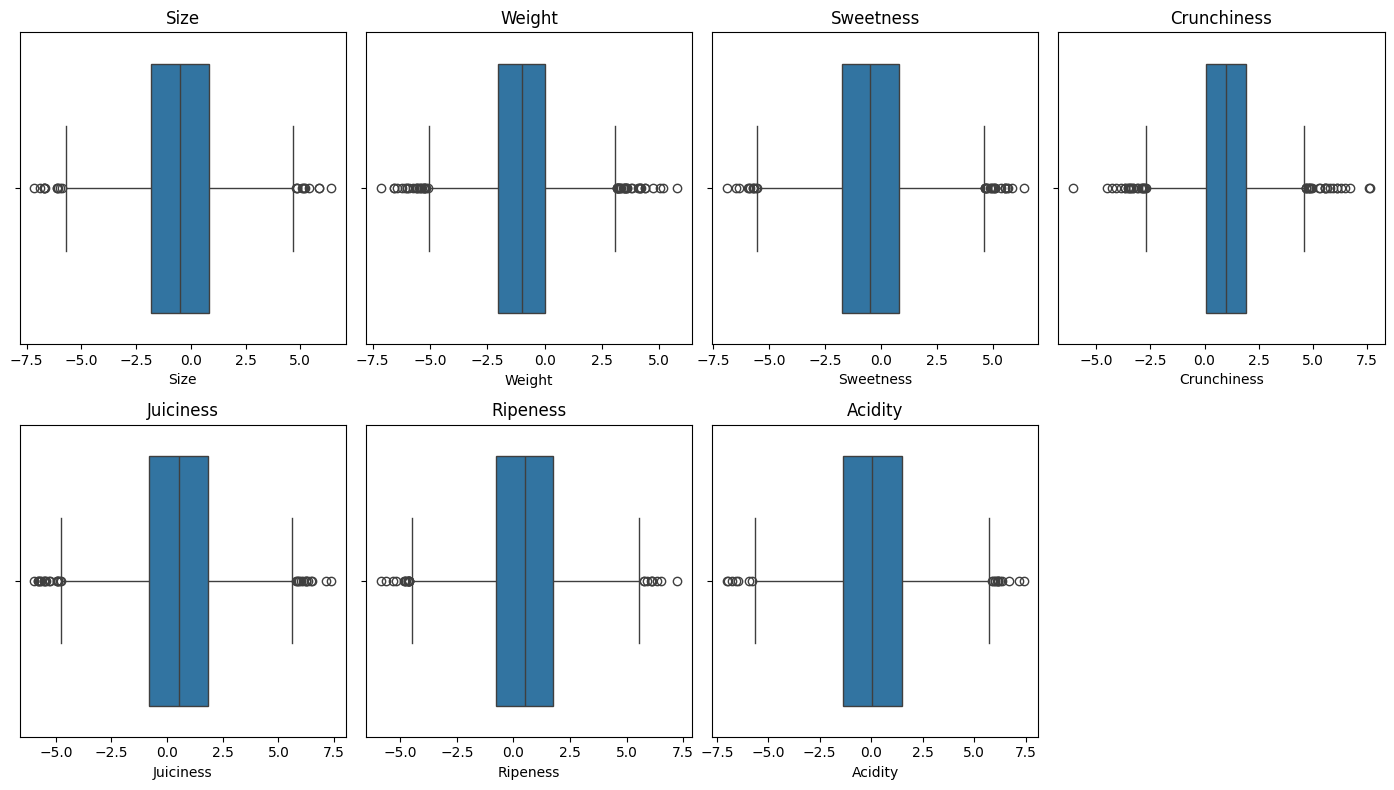

In [11]:
plt.figure(figsize=(14, 8))
num_columns = len(numeric_features.columns)
cols = min(num_columns, 4)
rows = num_columns // cols + (num_columns % cols > 0)
for index, column_name in enumerate(numeric_features.columns):
    plt.subplot(rows, cols, index+1)
    sns.boxplot(x=column_name, data=numeric_features)
    plt.title(column_name)

plt.tight_layout()
plt.show()

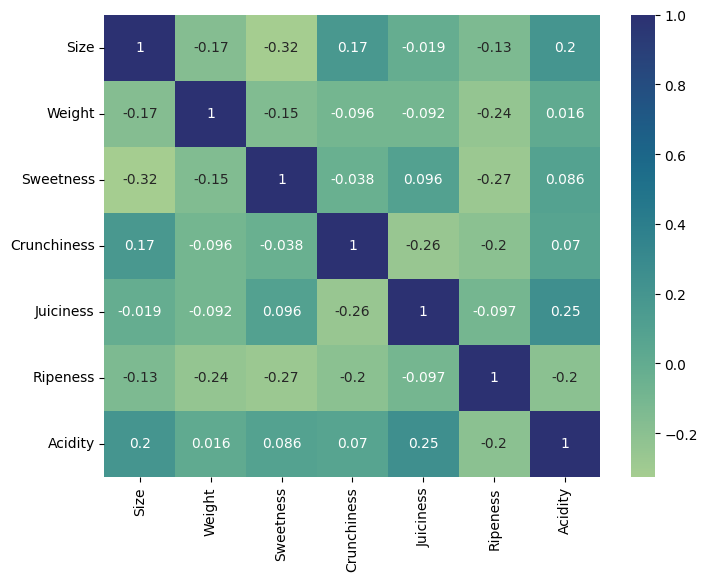

In [12]:
plt.figure(figsize=(8, 6))
corr_table = numeric_features.corr()
sns.heatmap(corr_table, annot=True, cmap='crest');

# Дисбаланс классов

In [13]:
tran = data_apple[data_apple['Quality']==1]
not_tran = data_apple[data_apple['Quality']==0]

In [14]:
from sklearn.utils import resample
not_downsample = resample(not_tran,
             replace=True,
             n_samples=len(tran),
             random_state=42)

In [15]:
data_ds = pd.concat([tran, not_downsample])
data_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 0 to 1982
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4008 non-null   int64  
 1   Size         4008 non-null   float64
 2   Weight       4008 non-null   float64
 3   Sweetness    4008 non-null   float64
 4   Crunchiness  4008 non-null   float64
 5   Juiciness    4008 non-null   float64
 6   Ripeness     4008 non-null   float64
 7   Acidity      4008 non-null   float64
 8   Quality      4008 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 313.1 KB


<Axes: ylabel='Type'>

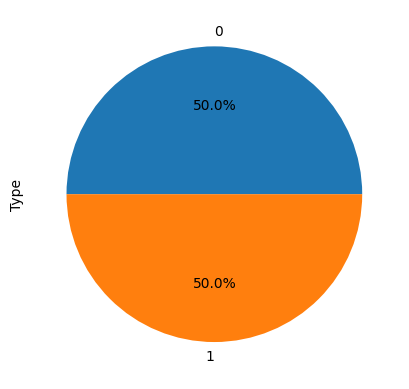

In [16]:
data_ds.groupby('Quality').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [23]:
data_ds.to_csv("apple2.csv",index=False)

# Обучение модели

In [18]:
X = data_apple.drop('Quality', axis=1)
y = data_apple['Quality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75375


In [22]:
import pickle

# Save the model to a file
with open('log_reg.pkl', 'wb') as pickle_out:
    pickle.dump(model, pickle_out)